In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

In [8]:
def plot_monitor_matrix_outcomes(classes, layers_indexes, performance_common_path, storage_common_path):
    for y in classes:
        for i in layers_indexes:
            performance_file_path = performance_common_path + "Layer_" + str(i) + "/monitor_performance_class_" + str(y) + ".csv"
            df = pd.read_csv(performance_file_path)
            taus = df["tau"]
            TP = df["TP"]
            FP = df["FP"]
            TN = df["TN"]
            FN = df["FN"]
            MP = df["MP"]
            MN = df["MN"]
            num_real_positive = TP[0]+FN[0]+MP[0]
            num_real_negative = TN[0]+FP[0]+MN[0]

            plt.figure()
            plt.plot(taus, TN, label = "TN", color='green', marker='|')
            plt.plot(taus, TP, label = "TP", color='red', marker='s')
            plt.plot(taus, FP, label = "FP", color='cyan', marker='o')
            plt.plot(taus, FN, label = "FN", color='magenta', marker='x')
            plt.plot(taus, MP, label = "MP", color='yellow', marker='d')
            plt.plot(taus, MN, label = "MN", color='black', marker='+')
            plt.hlines(num_real_negative, taus[0], taus[11], colors='green', linestyles='solid', label='real negative')
            plt.hlines(num_real_positive, taus[0], taus[11], colors='red', linestyles='solid', label='real positive')
            
            plt.legend()
            plt.xlabel(r'clustering parameter $\tau$')
            plt.ylabel('number of each possible outcome')
            plt.title("monitor_class_" + str(y) + "_layer_" + str(i))
            plt.savefig(storage_common_path + "outcomes_numbers_" + "_class_" + str(y) + "_layer_" + str(i) + ".pdf")
            plt.show()

In [9]:
def instance_0_MNIST_monitor_matrix_outcomes():
    classes = range(10)
    layers_indexes = [9] # [9, 8, 7, 6]
    performance_common_path = "./models/MNIST/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/MNIST/MNIST_"
    plot_monitor_matrix_outcomes(classes, layers_indexes, performance_common_path, storage_common_path)

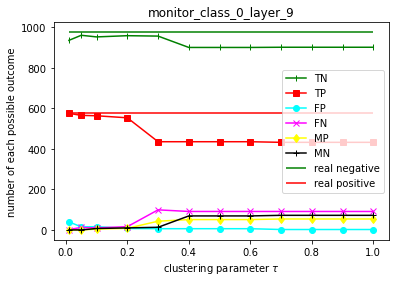

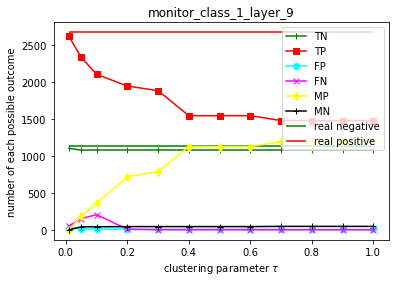

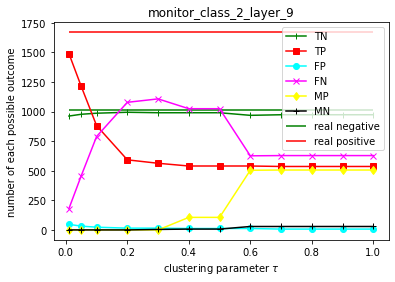

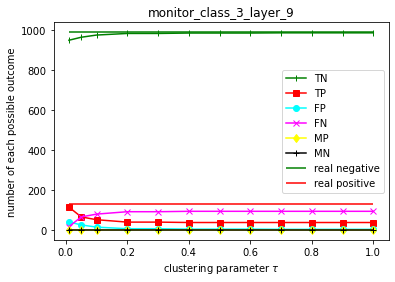

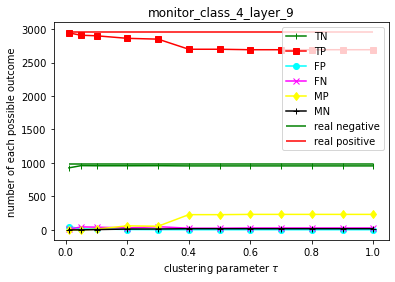

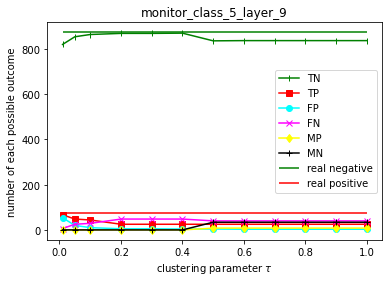

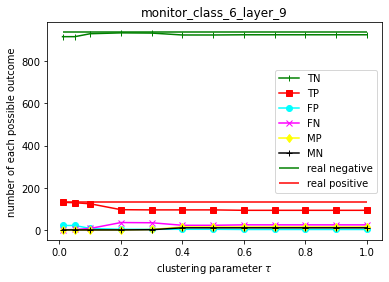

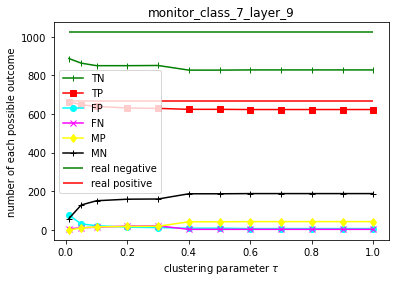

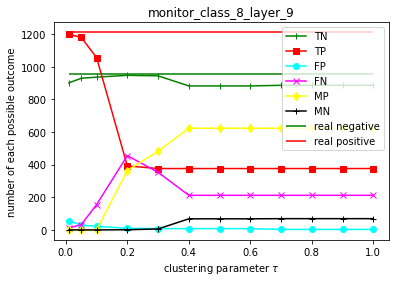

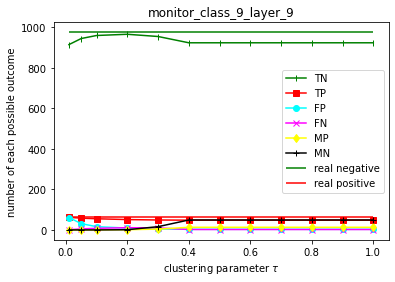

In [10]:
instance_1_MNIST_monitor_matrix_outcomes()

In [ ]:
def instance_1_F_MNIST_monitor_matrix_outcomes():
    classes = range(10)
    layers_indexes = [6] # [9, 8, 7, 6]
    performance_common_path = "./models/F_MNIST/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/F_MNIST/F_MNIST_"
    plot_monitor_matrix_outcomes(classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_1_F_MNIST_monitor_matrix_outcomes()

In [ ]:
def instance_2_CIFAR10_monitor_matrix_outcomes():
    classes = range(10)
    layers_indexes = [8, 9, 10, 11] 
    performance_common_path = "./models/CIFAR10/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/CIFAR10/CIFAR10_"

In [ ]:
# instance_2_CIFAR10_monitor_matrix_outcomes()

In [ ]:
def instance_3_GTSRB_monitor_matrix_outcomes():
    classes = range(43)
    layers_indexes = [8, 9, 10, 11] 
    performance_common_path = "./models/GTSRB/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/GTSRB/GTSRB_"

In [ ]:
# instance_3_GTSRB_monitor_matrix_outcomes()

In [ ]:
def plot_monitor_performance_PR_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path):
    for y in classes:
        points_to_plot_all_layers = dict()
        # false_positives_rates_all_layers = dict()

        for i in layers_indexes:
            performance_file_path = performance_common_path + "Layer_" + str(i) + "/monitor_performance_class_" + str(y) + ".csv"
            df = pd.read_csv(performance_file_path)
            TP = df["TP"]
            FP = df["FP"]
            TN = df["TN"]
            FN = df["FN"]
            MP = df["MP"]
            MN = df["MN"]
            
            points = []
            for j in range(len(TP)):
                precision = TP[j] / (TP[j] + FP[j])
                recall = TP[j] / (TP[j] + FN[j] + MP[j])
                point = [recall, precision]
                points.append(point)
                
            points_array = np.array(points)
            sorted_points_to_plot = points_array[points_array[:,0].argsort()]
            points_to_plot_all_layers["layer_"+str(i)] = sorted_points_to_plot


        # plt.plot(taus, lower_bounds, label='g'+str(gg), linestyle=ls, linewidth=lw)
        plt.figure()
        plt.plot(points_to_plot_all_layers["layer_9"][:,0], points_to_plot_all_layers["layer_9"][:,1], label = "layer_9", color='red', marker='s')
        plt.plot(points_to_plot_all_layers["layer_8"][:,0], points_to_plot_all_layers["layer_8"][:,1], label = "layer_8", color='cyan', marker='o')
        plt.plot(points_to_plot_all_layers["layer_7"][:,0], points_to_plot_all_layers["layer_7"][:,1], label = "layer_7", color='black', marker='|')
        plt.plot(points_to_plot_all_layers["layer_6"][:,0], points_to_plot_all_layers["layer_6"][:,1], label = "layer_6", color='magenta', marker='o')
        #plt.plot(points_to_plot_all_layers["layer_5"][:,0], points_to_plot_all_layers["layer_5"][:,1], label = "layer_5", color='green', marker='+')
        plt.legend()
        plt.xlabel(r'recall')
        plt.ylabel('precision')
        plt.title(benchmark + "_class_" + str(y))
        plt.savefig(storage_common_path + benchmark + "_PR_curve" + "_class_" + str(y) + ".pdf")
        plt.show()

In [ ]:
def instance_0_MNIST_PR_curves():
    benchmark = "MNIST"
    classes = range(10)
    layers_indexes = [9, 8, 7, 6]
    performance_common_path = "./models/MNIST/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/ROC_curves/"
    plot_monitor_performance_PR_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_0_MNIST_PR_curves()

In [ ]:
def instance_1_F_MNIST_PR_curves():
    benchmark = "F_MNIST"
    classes = range(10)
    layers_indexes = [9, 8, 7, 6]
    performance_common_path = "./models/F_MNIST/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/ROC_curves/"
    plot_monitor_performance_PR_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_1_F_MNIST_PR_curves()

In [ ]:
def instance_2_CIFAR10_PR_curves():
    benchmark = "CIFAR10"
    classes = range(10)
    layers_indexes = [11, 10, 9, 8]
    performance_common_path = "./models/CIFAR10/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/ROC_curves/"
    plot_monitor_performance_PR_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_2_CIFAR10_PR_curves()

In [ ]:
def instance_3_GTSRB_PR_curves():
    benchmark = "GTSRB"
    classes = range(43)
    layers_indexes = [11, 10, 9, 8]
    performance_common_path = "./models/GTSRB/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/ROC_curves/"
    plot_monitor_performance_PR_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_3_GTSRB_PR_curves()

In [ ]:
def plot_monitor_performance_ROC_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path):
    for y in classes:
        points_to_plot_all_layers = dict()

        for i in layers_indexes:
            performance_file_path = performance_common_path + "Layer_" + str(i) + "/monitor_performance_class_" + str(y) + ".csv"
            df = pd.read_csv(performance_file_path)
            TP = df["TP"]
            FP = df["FP"]
            TN = df["TN"]
            FN = df["FN"]
            MP = df["MP"]
            MN = df["MN"]
            points = []
            
            for j in range(len(TP)):
                true_postive_rate = TP[j] / (TP[j] + FP[j])
                false_positive_rate = FP[j] / (FP[j] + TN[j] + MN[j])
                point = [false_positive_rate, true_postive_rate]
                points.append(point)
                
            points_array = np.array(points)
            sorted_points_to_plot = points_array[points_array[:,0].argsort()]
            points_to_plot_all_layers["layer_"+str(i)] = sorted_points_to_plot


        # plt.plot(taus, lower_bounds, label='g'+str(gg), linestyle=ls, linewidth=lw)
        plt.figure()
        for i in layers_indexes: 
            plt.plot(points_to_plot_all_layers["layer_" + str(i)][:,0], points_to_plot_all_layers["layer_" + str(i)][:,1], label = "layer_" + str(i))
#             plt.plot(points_to_plot_all_layers["layer_8"][:,0], points_to_plot_all_layers["layer_8"][:,1], label = "layer_8", color='cyan', marker='o')
#             plt.plot(points_to_plot_all_layers["layer_7"][:,0], points_to_plot_all_layers["layer_7"][:,1], label = "layer_7", color='black', marker='|')
#             plt.plot(points_to_plot_all_layers["layer_6"][:,0], points_to_plot_all_layers["layer_6"][:,1], label = "layer_6", color='magenta', marker='x')
        
        plt.legend()
        plt.xlabel(r'false postive rate')
        plt.ylabel('true positve rate')
        plt.title(benchmark + "_class_" + str(y))
        plt.savefig(storage_common_path + benchmark + "_ROC_curve" + "_class_" + str(y) + ".pdf")
        plt.show()

In [ ]:
def instance_0_MNIST_ROC_curve():
    benchmark = "MNIST"
    classes = range(10)
    layers_indexes = [9, 8, 7, 6]
    performance_common_path = "./models/MNIST/Monitors/retest_results/"
    storage_common_path = "./exp_results_monitors_performance/ROC_curves/"
    plot_monitor_performance_ROC_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_0_MNIST_ROC_curve()

In [ ]:
def instance_1_F_MNIST_ROC_curve():
    benchmark = "F_MNIST"
    classes = range(10)
    layers_indexes = [9, 8, 7, 6]
    performance_common_path = "./models/F_MNIST/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/ROC_curves/"
    plot_monitor_performance_ROC_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_1_F_MNIST_ROC_curve()

In [ ]:
def instance_2_CIFAR10_ROC_curve():
    benchmark = "CIFAR10"
    classes = range(10)
    layers_indexes = [11, 10, 9, 8]
    performance_common_path = "./models/CIFAR10/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/ROC_curves/"
    plot_monitor_performance_ROC_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_2_CIFAR10_ROC_curve()

In [ ]:
def instance_3_GTSRB_ROC_curve():
    benchmark = "GTSRB"
    classes = range(43)
    layers_indexes = [11, 10, 9, 8]
    performance_common_path = "./models/GTSRB/Monitors/test_results/"
    storage_common_path = "./exp_results_monitors_performance/ROC_curves/"
    plot_monitor_performance_ROC_curve(benchmark, classes, layers_indexes, performance_common_path, storage_common_path)

In [ ]:
# instance_3_GTSRB_ROC_curve()